In [23]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

In [24]:
# import data
data = pd.read_csv("reviews.csv")
data.head()

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [25]:
data.describe()

,rating,helpfulVotes
count,67986.000000,27215.000000
mean,3.807916,8.229690
std,1.582906,31.954877
min,1.000000,1.000000
25%,3.000000,1.000000
50%,5.000000,2.000000
75%,5.000000,5.000000
max,5.000000,990.000000


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67986 entries, 0 to 67985
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   asin          67986 non-null  object 
 1   name          67984 non-null  object 
 2   rating        67986 non-null  int64  
 3   date          67986 non-null  object 
 4   verified      67986 non-null  bool   
 5   title         67972 non-null  object 
 6   body          67965 non-null  object 
 7   helpfulVotes  27215 non-null  float64
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 3.7+ MB


In [27]:
data = data.dropna()

In [28]:
# remove columns that we wont use
data = data.drop(columns=["asin", "name", "date","verified", "helpfulVotes"], axis=1)

In [29]:
data.head()

,rating,title,body
0,3,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...
1,1,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...
2,5,Love This Phone,"This is a great, reliable phone. I also purcha..."
3,3,"Love the Phone, BUT...!","I love the phone and all, because I really did..."
4,4,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...


In [30]:
rating = data['rating'].value_counts()
number = rating.index
quantity = rating.values

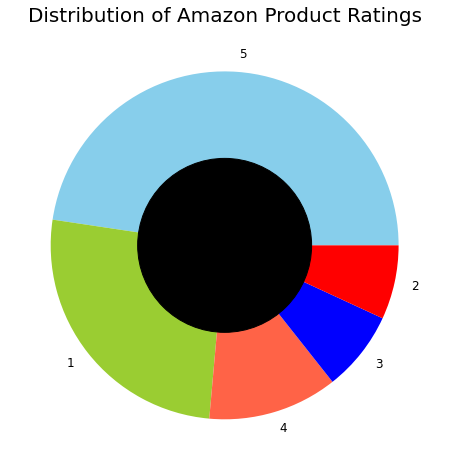

In [31]:
custom_colors = ["skyblue", 'yellowgreen', 'tomato', "blue", "red"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=number, colors=custom_colors)
central_circle = plt.Circle((0,0), 0.5, color = "black")
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Amazon Product Ratings", fontsize = 20)
plt.show()

A majority fo the ratings on the products purchsed were 5 and 1 star. Next we add columns with polarity on the ratings based on sentiment scores of the revnies.

In [32]:
data['Positive'] = [sentiment.polarity_scores(i)["pos"] for i in data["body"]]
data['Negative'] = [sentiment.polarity_scores(i)["neg"] for i in data["body"]]
data['Neutral'] = [sentiment.polarity_scores(i)["neu"] for i in data["body"]]
data.head()

,rating,title,body,Positive,Negative,Neutral
0,3,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,0.105,0.080,0.816
1,1,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,0.104,0.020,0.876
2,5,Love This Phone,"This is a great, reliable phone. I also purcha...",0.103,0.051,0.846
3,3,"Love the Phone, BUT...!","I love the phone and all, because I really did...",0.156,0.000,0.844
4,4,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,0.121,0.066,0.814


In [35]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Generally Postitive")
    if (b>a) and (b>c):
        print("Generally Negative")
    else:
        print("Generally Neutral")
        
sentiment_score(x, y, z)

print("positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Generally Neutral
positive:  5022.301000000003
Negative:  1756.803999999994
Neutral:  20417.808000000085


We can thereofe conlude that the review on amazon products are generally Postitive as hte sum of neutral and postive outdo those of negative sentiments.